In [1]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [2]:
import requests

# URL of the notebook raw file
url = "https://raw.githubusercontent.com/adnanarnaout/machine-learning-dse-i210-final-project-nyc-car-accident-severity/main/notebooks/Establish-baseline-logistic-regression-model-AA.ipynb"

# Make a GET request to fetch the raw content of the notebook
r = requests.get(url)
if r.status_code == 200:
    # Saving the notebook
    with open('local_notebook.ipynb', 'wb') as f:
        f.write(r.content)
    print("Notebook downloaded successfully.")
else:
    print("Failed to download the notebook. Status code:", r.status_code)


Notebook downloaded successfully.


In [3]:
%run './local_notebook.ipynb'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1057417 entries, 0 to 1057416
Data columns (total 15 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   CRASH DATE                     1057417 non-null  object 
 1   CRASH TIME                     1057417 non-null  object 
 2   LATITUDE                       1057417 non-null  float64
 3   LONGITUDE                      1057417 non-null  float64
 4   CONTRIBUTING FACTOR VEHICLE 1  1057417 non-null  object 
 5   CONTRIBUTING FACTOR VEHICLE 2  1057417 non-null  object 
 6   CONTRIBUTING FACTOR VEHICLE 3  1057417 non-null  object 
 7   CONTRIBUTING FACTOR VEHICLE 4  1057417 non-null  object 
 8   CONTRIBUTING FACTOR VEHICLE 5  1057417 non-null  object 
 9   VEHICLE TYPE CODE 1            1057417 non-null  object 
 10  VEHICLE TYPE CODE 2            1057417 non-null  object 
 11  VEHICLE TYPE CODE 3            1057417 non-null  object 
 12  VEHICLE TYPE C

/var/folders/wt/m5y59zzs6md5sgv_pfb_w9tm0000gn/T/ipykernel_18174/4059920979.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  mvc_processed['temp_datetime'] = pd.to_datetime(mvc_processed['CRASH TIME'].astype(str))
/Users/adnanarnaout/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8146762875678538
Confusion Matrix:
 [[159760   5079      0      0]
 [ 33727  12531      0      0]
 [   179     27      0      0]
 [   101     80      0      0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89    164839
           1       0.71      0.27      0.39     46258
           2       0.00      0.00      0.00       206
           3       0.00      0.00      0.00       181

    accuracy                           0.81    211484
   macro avg       0.38      0.31      0.32    211484
weighted avg       0.80      0.81      0.78    211484



/Users/adnanarnaout/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/adnanarnaout/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/adnanarnaout/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [5]:
import pandas as pd

# Checking for class imbalance
class_counts = mvc_processed['CLASS TYPE'].value_counts()
print(class_counts)

# Calculate the percentage of each class
class_percentage = mvc_processed['CLASS TYPE'].value_counts(normalize=True) * 100
print(class_percentage)

CLASS TYPE
Class 0    824193
Class 1    231289
Class 2      1030
Class 3       905
Name: count, dtype: int64
CLASS TYPE
Class 0    77.943990
Class 1    21.873017
Class 2     0.097407
Class 3     0.085586
Name: proportion, dtype: float64


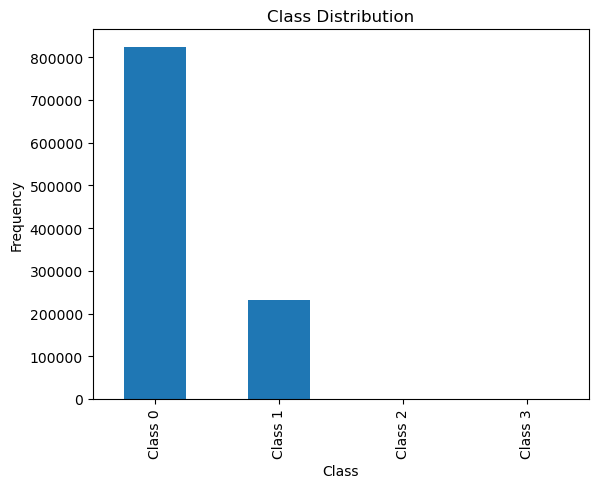

In [6]:
import matplotlib.pyplot as plt

# Plotting the distribution of the class
mvc_processed['CLASS TYPE'].value_counts().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution')
plt.show()


In [8]:
# Apply SMOTE to training data to oversample minority classes
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

In [9]:
# Logistic Regression model training

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Train model
model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)

# Predict on the original test set (not resampled)
y_pred = model.predict(X_test_scaled)

# Evaluate model
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


/Users/adnanarnaout/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.4693404702010554
              precision    recall  f1-score   support

           0       0.89      0.54      0.67    164839
           1       0.38      0.20      0.26     46258
           2       0.00      0.54      0.00       206
           3       0.00      0.80      0.01       181

    accuracy                           0.47    211484
   macro avg       0.32      0.52      0.24    211484
weighted avg       0.77      0.47      0.58    211484

